# Comparison with Other Methods

In [1]:
% Add path to data and solver
addpath(genpath('PROSTATE'))
addpath(genpath('minConf'))

### Set up various body structures and constraints

In [2]:
% Prostate
prostate.name = 'PTV_68';
pt1.type = 'unif'; pt1.dose = 81; pt1.weight = 1;
pt2.type = 'ldvc'; pt2.dose = 81; pt2.percent = 95; pt2.weight = 1;
pt3.type ='udvc'; pt3.dose = 1.12*81; pt3.percent = 0; pt3.weight = 1;

% Lymph nodes
nodes.name = 'PTV_56';
nt1.type = 'unif'; nt1.dose = 60; nt1.weight = 1;
nt2.type = 'ldvc'; nt2.dose = 60; nt2.percent = 95; nt2.weight = 1;
nt3.type = 'udvc'; nt3.dose = 1.12*60; nt3.percent = 0; nt3.weight = 1;

% Rectum
rectum.name = 'Rectum';
rt1.type = 'udvc'; rt1.dose = 50; rt1.percent = 50; rt1.weight = 1;
rt2.type = 'udvc'; rt2.dose = 30; rt2.percent = 30; rt2.weight = 1;
rt3.type = 'udvc'; rt3.dose = 10; rt3.percent = 10; rt3.weight = 1;
rt4.type = 'udvc'; rt4.dose = 75; rt4.percent = 0; rt4.weight = 1;
rt5.type = 'udvc'; rt5.dose = 60; rt5.percent = 20; rt5.weight = 1;
rt6.type = 'udvc'; rt6.dose = 20; rt6.percent = 60; rt6.weight = 1;

% Bladder
bladder.name = 'Bladder';
bt1.type = 'udvc'; bt1.dose = 30; bt1.percent = 30; bt1.weight = 1;

### Function to compute everything for me :)

In [46]:
%%file compareMethods.m

function compareMethods(structs,tol)

    % Create problem instance
    prob = FluenceMapOpt(structs,'tol',tol);
    disp('Initialization');
    prob.printStats(prob.x0);

    % Our Method
    prob.calcBeams(false); 
    xa = prob.x;
    fprintf('\nOur Method')
    fprintf('\nTime: %.2f\n',prob.time);
    prob.printStats(xa);
    
    % Our Method (hc)
    prob.constGen(xa); 
    xb = prob.x;
    fprintf('\nOur Method (hc)')
    fprintf('Time: %.2f\n',prob.time);
    prob.printStats(xb);
    
    % Iterative Method
    prob.iterDose(); 
    xc = prob.x;
    fprintf('\nIterative Method')
    fprintf('\nTime: %.2f\n',prob.time);
    prob.printStats(xc);
    
    % Iterative Method (hc)
    prob.constGen(xc)
    xd = prob.x;
    fprintf('\nIterative Method (hc)')
    fprintf('\nTime: %.2f\n',prob.time);
    prob.printStats(xd);
    
    % Constraint Generation
    prob.constGen(); 
    xe = prob.x;
    fprintf('\nConstraint Generation')
    fprintf('\nTime: %.2f\n',prob.time);
    prob.printStats(xe);
    
    % Convex Relaxation
    prob.convRelax(); 
    xf = prob.x;
    fprintf('\nConvex Relaxation')
    fprintf('\nTime: %.2f\n',prob.time);
    prob.printStats(xf);

    % Plots
    prob.compareVoxelDose(2,[xa,xb,xc,xd,xe,xf])
    prob.compareDVH([xa,xb,xc,xd,xe,xf],{'Our Method','Our Method (hc)','Iterative Method','Iterative Method (hc)','Constraint Generation','Convex Relaxation'})
end

Created file '/Users/Kelsey/Dropbox (uwamath)/FluenceMapOpt/compareMethods.m'.


# Example 4.1(a)

### Timing
* Our Method: 25.39 seconds
* Our Method (hc): 5.70 seconds
* Iterative Method: 0.44 seconds
* Iterative Method (hc): 5.80 seconds
* Constraint Generation: 5.15 seconds
* Convex Relaxation: 97.25 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 76.00 | 80.88 | 80.96 | 79.66 | 83.47 | 0.65 | 54.69
Our Method (hc) | 76.01 | 80.88 | 80.96 | 79.65 | 83.49 | 0.66 | 54.99
Iterative Method | 75.96 | 80.82 | 80.93 | 79.55 | 82.90 | 0.67 | 56.79
Iterative Method (hc) | 76.01 | 80.88 | 80.96 | 79.65 | 83.52 | 0.66 | 55.10
Constraint Generation | 75.83 | 80.88 | 80.96 | 79.64 | 83.55 | 0.66 | 55.48
Convex Relaxation | 73.95 | 80.86 | 80.95 | 79.27 | 83.49 | 0.87 | 72.64


### OAR
* No more than 50% of rectum volume may exceed 50 Gy

Method | % OAR > 50 | Area
-|-|-
Initialization | 56.80 | 4333.84
Our Method | 51.52 | 4218.74
Our Method (hc) | 50.00 | 4190.45
Iterative Method | 55.40 | 4292.44
Iterative Method (hc) | 49.70 | 4181.08
Constraint Generation | 49.51 | 4155.44
Convex Relaxation | 33.80 | 3715.46


Initialization
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 56.80 | 4333.84

Our Method
Time: 25.39
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.66 | 83.47 | 0.65 | 54.69
Structure: Rectum
* udvc | 51.52 | 4218.74

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.


Our Method (hc)Time: 5.70
Structure: PTV_68
* unif | 76.01 | 80.88 | 80.96 | 79.65 | 83.49 | 0.66 | 54.99
Structure: Rectum
* udvc | 50.00 | 4190.45

Iterative Method
Time: 0.44
Structure: PTV_68
* unif | 75.96 | 80.82 | 80.93 | 79.55 | 82.90 | 0.67 | 56.79
Structure: Rectum
* udvc | 55.40 | 4292.44

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible direct

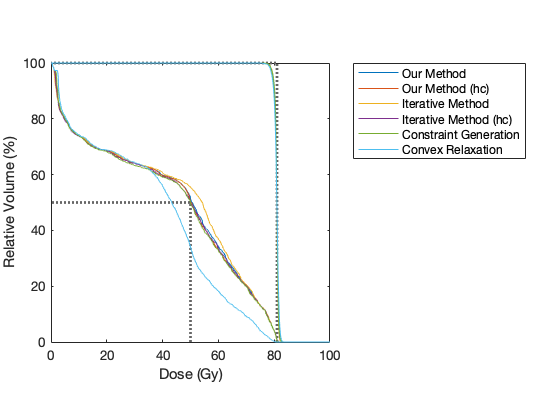

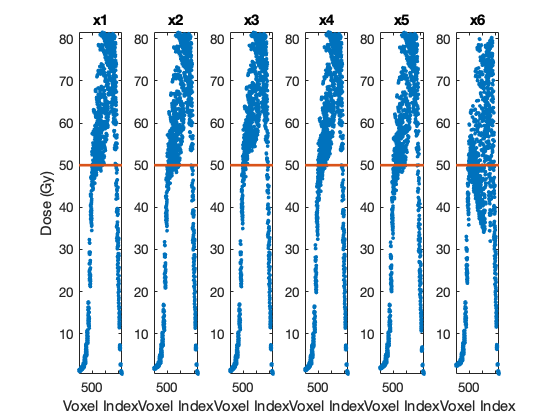

In [48]:
prostate.terms = {pt1};
rectum.terms = {rt1};
structs = {prostate,rectum};
compareMethods(structs,5e-5);

# Example 4.1(b)

### Timing
* Our Method: 52.41 seconds
* Our Method (hc): 7.99 seconds
* Iterative Method: 4.44 seconds
* Iterative Method (hc): 9.10 seconds
* Constraint Generation: 8.65 seconds
* Convex Relaxation: 108.39 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 72.58 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.20
Our Method (hc) | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Iterative Method | 66.94 | 80.68 | 80.93 | 78.23 | 85.26 | 1.58 | 132.70
Iterative Method (hc) | 69.03 | 80.82 | 80.96 | 78.81 | 85.59 | 1.26 | 105.05
Constraint Generation | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Convex Relaxation | 53.43 | 80.64 | 80.87 | 76.93 | 94.70 | 3.06 | 253.70

### OAR
* No more than 30% of rectum volume may exceed 30 Gy

Method | % OAR > 30 | Area
-|-|-
Initialization | 64.14 | 4333.84
Our Method | 33.37 | 2789.26
Our Method (hc) | 29.98 | 2624.35
Iterative Method | 37.08 | 2978.45
Iterative Method (hc) | 29.73 | 2645.61
Constraint Generation | 28.82 | 2497.81
Convex Relaxation | 21.78 | 2002.42

Initialization
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 64.14 | 4333.84

Our Method
Time: 50.53
Structure: PTV_68
* unif | 72.58 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.20
Structure: Rectum
* udvc | 33.37 | 2789.26

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.


Our Method (hc)Time: 7.77
Structure: PTV_68
* unif | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Structure: Rectum
* udvc | 29.98 | 2624.35

Iterative Method
Time: 4.44
Structure: PTV_68
* unif | 66.94 | 80.68 | 80.93 | 78.23 | 85.26 | 1.58 | 132.70
Structure: Rectum
* udvc | 37.08 | 2978.45

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible direc

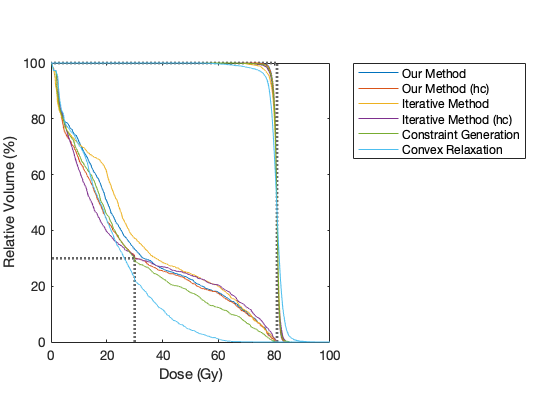

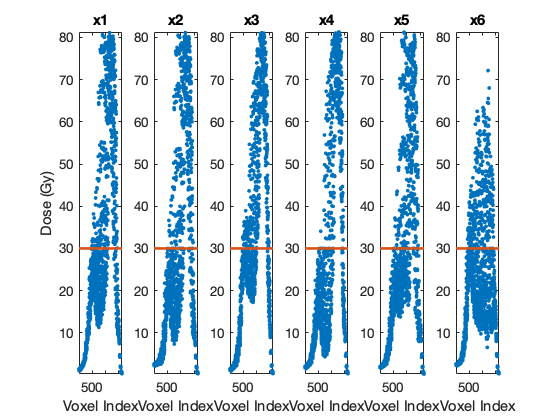

In [49]:
prostate.terms = {pt1};
rectum.terms = {rt2};
structs = {prostate,rectum};
compareMethods(structs,5e-5);

# Example 4.1(c)

### Timing
* Our Method: 34.08 seconds
* Our Method (hc): 10.41 seconds
* Iterative Method: 9.75 seconds
* Iterative Method (hc): 11.30 seconds
* Constraint Generation: 10.84 seconds
* Convex Relaxation: 112.51 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 42.25 | 80.39 | 80.85 | 74.81 | 92.96 | 4.31 | 358.11
Our Method (hc) | 16.73 | 78.53 | 80.37 | 57.29 | 97.67 | 9.84 | 834.90
Iterative Method | 33.45 | 80.22 | 80.81 | 73.65 | 94.96 | 4.85 | 403.80
Iterative Method (hc) | 13.00 | 78.43 | 80.38 | 57.56 | 99.99 | 9.82 | 835.08
Constraint Generation | 16.18 | 78.81 | 80.51 | 58.62 | 103.13 | 10.14 | 853.41
Convex Relaxation | 12.89 | 78.77 | 80.49 | 59.96 | 100.68 | 10.20 | 858.59

### OAR
* No more than 10% of rectum volume may exceed 10 Gy

Method | % OAR > 10 | Area
-|-|-
Initialization | 73.97 | 4333.84
Our Method | 23.85 | 941.30
Our Method (hc) | 8.19 | 471.89
Iterative Method | 30.10 | 993.52
Iterative Method (hc) | 8.74 | 564.68
Constraint Generation | 7.46 | 465.74
Convex Relaxation | 7.83 | 511.64

Initialization
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 73.97 | 4333.84

Our Method
Time: 44.52
Structure: PTV_68
* unif | 42.25 | 80.39 | 80.85 | 74.81 | 92.96 | 4.31 | 358.11
Structure: Rectum
* udvc | 23.85 | 941.30

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.


Our Method (hc)Time: 11.38
Structure: PTV_68
* unif | 16.73 | 78.53 | 80.37 | 57.29 | 97.67 | 9.84 | 834.90
Structure: Rectum
* udvc | 8.19 | 471.89

Iterative Method
Time: 9.75
Structure: PTV_68
* unif | 33.45 | 80.22 | 80.81 | 73.65 | 94.96 | 4.85 | 403.80
Structure: Rectum
* udvc | 30.10 | 993.52

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible direct

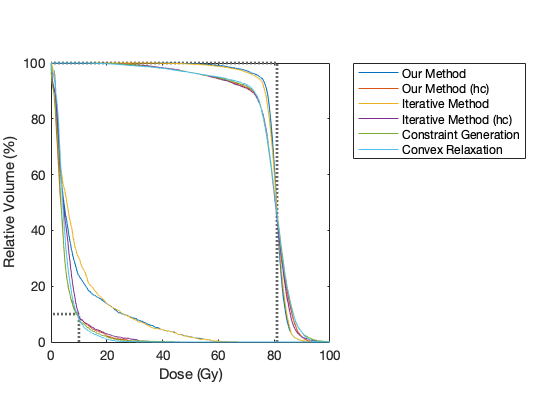

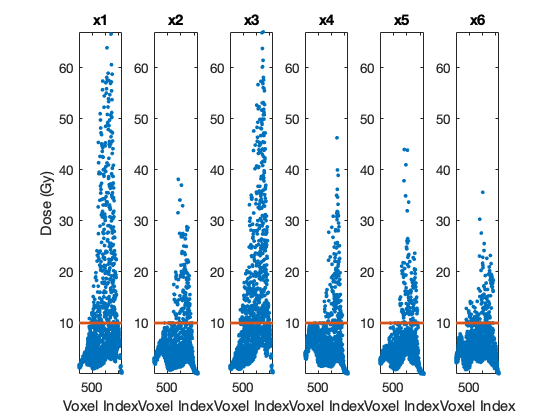

In [50]:
prostate.terms = {pt1};
rectum.terms = {rt3};
structs = {prostate,rectum};
compareMethods(structs,5e-5);

# Example 4.2

### Timing
* Our Method: 102.81 seconds
* Our Method (hc): 30.23 seconds
* Iterative Method: 8.97 seconds
* Iterative Method (hc): 28.84 seconds
* Constraint Generation: 30.70 seconds
* Convex Relaxation: 234.31 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 75.28 | 80.82 | 80.94 | 79.03 | 83.70 | 0.88 | 74.16
Our Method (hc) | 73.06 | 80.77 | 80.93 | 78.72 | 83.85 | 1.07 | 90.47
Iterative Method | 74.03 | 80.70 | 80.93 | 78.50 | 82.91 | 1.07 | 91.20
Iterative Method (hc) | 73.19 | 80.76 | 80.93 | 78.71 | 84.15 | 1.08 | 91.14
Constraint Generation | 73.17 | 80.76 | 80.93 | 78.66 | 84.84 | 1.10 | 92.58
Convex Relaxation | 54.79 | 80.74 | 80.87 | 77.82 | 93.69 | 2.29 | 189.20

### OAR
* No more than 60% of rectum volume may exceed 20 Gy
* No more than 50% of the rectum volume may exceed 50 Gy
* No more than 20% of the rectum volume may exceed 60 Gy
* No more than 0% of the rectum volume may exceed 75 Gy

Method | % OAR > 20 | % OAR > 50 | % OAR > 60 | % OAR > 75 | Area
-|-|-|-|-|-
Initialization | 68.81 | 56.80 | 38.47 | 13.41 | 4333.84
Our Method | 61.41 | 46.72 | 21.66 | 3.94 | 3607.90
Our Method (hc) | 59.95 | 37.08 | 19.17 | 0.00 | 3401.83
Iterative Method | 63.77 | 46.78 | 24.88 | 4.31 | 3699.20
Iterative Method (hc) | 59.89 | 33.98 | 18.51 | 0.00 | 3330.89
Constraint Generation | 59.41 | 31.92 | 18.33 | 0.00 | 3279.43
Convex Relaxation | 37.80 | 8.07 | 4.07 | 0.00 | 1961.21

Initialization
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 56.80 | 4333.84
* udvc | 13.41 | 4333.84
* udvc | 38.47 | 4333.84
* udvc | 68.81 | 4333.84

Our Method
Time: 115.13
Structure: PTV_68
* unif | 75.28 | 80.82 | 80.94 | 79.03 | 83.70 | 0.88 | 74.16
Structure: Rectum
* udvc | 46.78 | 3606.72
* udvc | 3.94 | 3606.72
* udvc | 21.66 | 3606.72
* udvc | 61.41 | 3606.72

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.


Our Method (hc)Time: 29.43
Structure: PTV_68
* unif | 73.06 | 80.77 | 80.93 | 78.72 | 83.85 | 1.07 | 90.47
Structure: Rectum
* udvc | 37.08 | 3401.83
* udvc | 0.00 | 3401.83
* udvc | 19.17 | 3401.83
* udvc | 59.95 | 3401.83

Iterative Method
Time: 8.97
Structure: PTV_68
* unif | 74.03 | 80

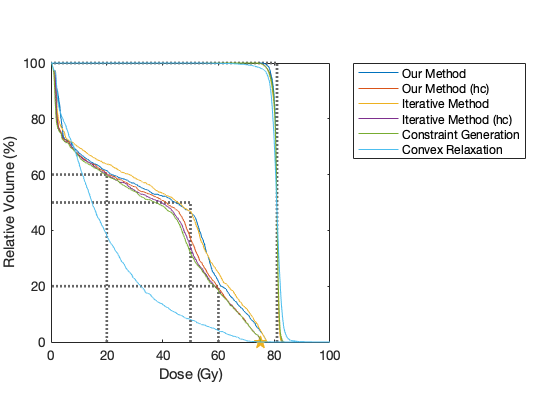

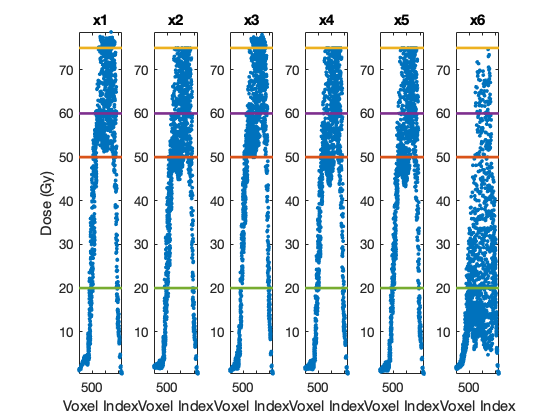

In [51]:
prostate.terms = {pt1};
rectum.terms = {rt1,rt4,rt5,rt6};
structs = {prostate,rectum};
compareMethods(structs,5e-5);

# Example 4.3

### Timing
* Our Method: 99.05 seconds
* Our Method (hc): 39.00 seconds
* Iterative Method: 24.52 seconds
* Iterative Method (hc): 39.10 seconds
* Constraint Generation: 40.50 seconds
* Convex Relaxation: 466.17 seconds

Iterative Method
Time: 
Structure: PTV_68
* unif 
Structure: Rectum
* udvc 
Structure: Bladder
* udvc 
Structure: PTV_56
* unif 

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.


Iterative Method (hc)
Time: 
Structure: PTV_68
* unif 
Structure: Rectum
* udvc 
Structure: Bladder
* udvc 
Structure: PTV_56
* unif 


### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 67.55 | 80.55 | 80.93 | 77.14 | 85.86 | 1.88 | 159.01
Our Method | 66.95 | 80.53 | 80.93 | 76.73 | 85.97 | 1.94 | 164.61
Our Method (hc) | 66.53 | 80.52 | 80.93 | 76.64 | 86.06 | 1.97 | 166.68
Iterative Method | 66.99 | 80.49 | 80.93 | 76.57 | 85.90 | 1.96 | 166.67
Iterative Method (hc) | 66.70 | 80.53 | 80.94 | 76.70 | 86.10 | 1.94 | 163.89
Constraint Generation | 66.66 | 80.51 | 80.92 | 76.66 | 85.67 | 1.96 | 165.85
Convex Relaxation | 39.71 | 79.82 | 80.71 | 70.35 | 92.42 | 5.01 | 423.70

* Uniform dose of 60 Gy to lymph nodes

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 52.86 | 60.26 | 59.97 | 58.57 | 75.17 | 1.87 | 172.34
Our Method | 50.99 | 60.19 | 59.98 | 57.79 | 75.15 | 2.09 | 191.30
Our Method (hc) | 48.73 | 60.15 | 59.97 | 57.46 | 75.35 | 2.19 | 200.20
Iterative Method | 46.21 | 60.09 | 59.98 | 56.86 | 75.58 | 2.30 | 209.93
Iterative Method (hc) | 43.17 | 60.08 | 59.97 | 56.68 | 75.89 | 2.42 | 220.87
Constraint Generation | 41.50 | 59.96 | 59.91 | 55.89 | 75.58 | 2.68 | 244.46
Convex Relaxation | 43.07 | 60.08 | 59.97 | 55.47 | 77.46 | 3.04 | 277.46

### OAR
* No more than 50% of the rectum volume may exceed 50 Gy
* No more than 30% of the bladder volume may exceed 30 Gy

Method | % R > 50 | R Area | % B > 30 | B Area
-|-|-|-|-
Initialization | 82.04 | 5671.84 | 92.21 | 4780.08
Our Method | 57.04 | 5164.85 | 35.76 | 3304.69
Our Method (hc) | 50.00 | 5097.80 | 29.99 | 3007.40
Iterative Method | 57.71 | 5301.63 | 38.98 | 3386.77
Iterative Method (hc) | 49.45 | 5156.73 | 29.85 | 2950.58
Constraint Generation | 43.26 | 4934.76 | 28.29 | 2816.25
Convex Relaxation | 31.74 | 4410.61 | 22.01 | 2250.19

Initialization
Structure: PTV_68
* unif | 67.55 | 80.55 | 80.93 | 77.14 | 85.86 | 1.88 | 159.01
Structure: Rectum
* udvc | 82.04 | 5671.84
Structure: Bladder
* udvc | 92.21 | 4780.08
Structure: PTV_56
* unif | 52.86 | 60.26 | 59.97 | 58.57 | 75.17 | 1.87 | 172.34

Our Method
Time: 91.63
Structure: PTV_68
* unif | 66.95 | 80.53 | 80.93 | 76.73 | 85.97 | 1.94 | 164.61
Structure: Rectum
* udvc | 57.04 | 5164.85
Structure: Bladder
* udvc | 35.76 | 3304.69
Structure: PTV_56
* unif | 50.99 | 60.19 | 59.98 | 57.79 | 75.15 | 2.09 | 191.30

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.


Our Method (hc)Time: 37.85
Structure: PTV_68
* unif | 66.53 | 80.52 | 80.93 | 76.64 | 86.06 | 1.97 | 166.68
Structure: Rectum
* udvc | 50.00 | 5097.80
Structure: Bladder
* udvc | 29.99 | 3

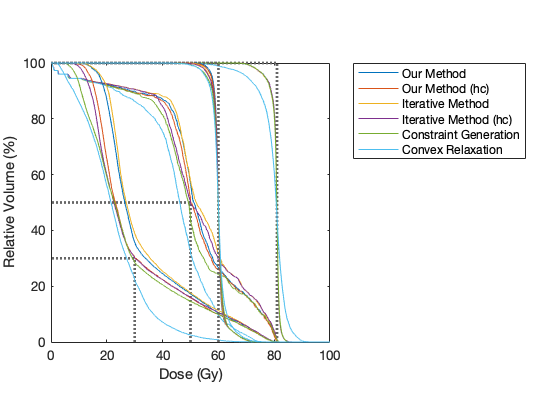

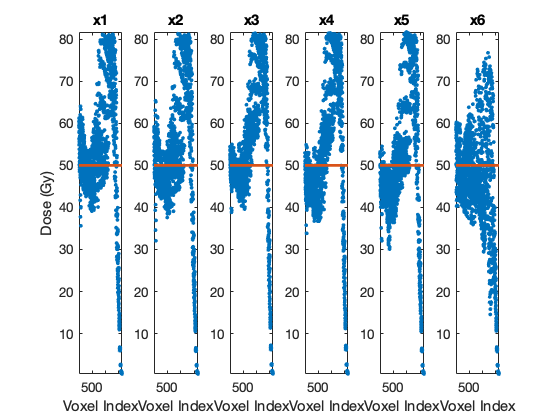

In [52]:
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
structs = {prostate,rectum,bladder,nodes};
compareMethods(structs,5e-5);